# Tarea 1 - Taller de Deep Learning

**Fecha de entrega: 19/10/2025**  

In [4]:
import torchvision.datasets as datasets
from pathlib import Path
import torch
import torch.nn as nn
from torchvision.transforms import v2 as T
from torch.utils.data import DataLoader, random_split
import utils
import sys
import torch.optim as optim


la ki
cb879b8473582418585ac8a9fcb1e1695ebcdf97

In [5]:
import wandb

wandb.login()

True

In [6]:
DEVICE = "cpu"  # por defecto, usamos la CPU
if torch.cuda.is_available():
    DEVICE = "cuda"  # si hay GPU, usamos la GPU
elif torch.backends.mps.is_available():
    DEVICE = "mps"  # si no hay GPU, pero hay MPS, usamos MPS
elif torch.xpu.is_available():
    DEVICE = "xpu"  # si no hay GPU, pero hay XPU, usamos XPU

print(f"Usando {DEVICE}")

NUM_WORKERS = 0 # Win y MacOS pueden tener problemas con múltiples workers
if sys.platform == 'linux':
    NUM_WORKERS = 4  # numero de workers para cargar los datos (depende de cada caso)

print(f"Usando {NUM_WORKERS}")

Usando cuda
Usando 4


In [7]:
DATA_DIR = Path("data")



imagenette_dataset = datasets.Imagenette(
    DATA_DIR, download=False
)

transforms = T.Compose([
    T.ToImage(),
    T.Grayscale(),
    T.ToDtype(torch.float32, scale=True),
    T.Resize((224, 224))

])

imagenette_dataset_train = datasets.Imagenette(
    DATA_DIR, download=False,split = 'train', transform=transforms
)

imagenette_dataset_val = datasets.Imagenette(
    DATA_DIR, download=False,split = 'val', transform=transforms
)

name_classes = imagenette_dataset.classes
nclasses = len(name_classes)


In [8]:
imagenette_dataset_train, imagenette_dataset_test = random_split(
    imagenette_dataset_train, [0.8, 0.2]
)

In [9]:
BATCH_SIZE = 128  # tamaño del batch
def get_dataloaders(batch_size=BATCH_SIZE, num_workers=NUM_WORKERS):
    train_loader = DataLoader(
        imagenette_dataset_train,
        batch_size=batch_size,
        shuffle=True,
        num_workers=num_workers,
    )

    val_loader = DataLoader(
        imagenette_dataset_val,
        batch_size=batch_size,
        shuffle=False,
        num_workers=num_workers,
    )

    test_loader = DataLoader(
        imagenette_dataset_test,
        batch_size=batch_size,
        shuffle=False,
        num_workers=num_workers,
    )

    return train_loader, val_loader, test_loader


train_loader, val_loader, test_loader = get_dataloaders()

In [10]:
class SimpleCNN(nn.Module):
    def __init__(self, input, n_classes):
        super().__init__()
        self.conv = nn.Sequential(
            #224*224
            nn.Conv2d(input[0], 32, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            #112*112
            nn.Conv2d(32, 32, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            #56*56
            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2)
            #28*28
            )
        
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(64 * 28 * 28, 512),
            nn.ReLU(inplace=True),
            nn.Linear(512, 256),
            nn.ReLU(inplace=True),
            nn.Linear(256, n_classes),
        )
    def forward(self, x):
        x = self.conv(x)
        x = self.classifier(x)
        return x

In [11]:
modelo = SimpleCNN(train_loader.dataset[0][0].shape, nclasses).to(DEVICE)
print(modelo)

# Funciones de entrenamiento/validación rápidas (para prueba)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(modelo.parameters(), lr=1e-3)

SimpleCNN(
  (conv): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=50176, out_features=512, bias=True)
    (2): ReLU(inplace=True)
    (3): Linear(in_features=512, out_features=256, bias=True)
    (4): ReLU(inplace=True)
    (5): Linear(in_features=256, out_features=10, bias=True)
  )
)


In [12]:
train_errors, val_errors = utils.train(modelo, optimizer=optimizer, criterion=criterion, do_early_stopping=False,train_loader=train_loader, val_loader=val_loader, device=DEVICE, epochs=10)

KeyboardInterrupt: 

In [ ]:
train_errors, val_errors = utils.train(modelo, optimizer=optimizer, criterion=criterion, do_early_stopping=False,train_loader=train_loader, val_loader=val_loader, device=DEVICE, epochs=10)

KeyboardInterrupt: 

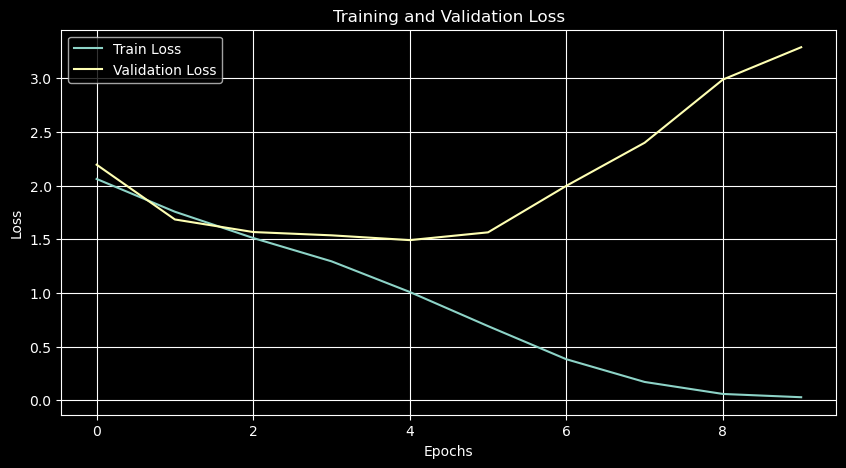

Accuracy: 0.5066

Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.66      0.55      0.60       223
           1       0.40      0.79      0.54       179
           2       0.52      0.54      0.53       189
           3       0.29      0.13      0.18       168
           4       0.54      0.59      0.56       182
           5       0.53      0.54      0.53       171
           6       0.67      0.49      0.57       200
           7       0.31      0.38      0.34       177
           8       0.55      0.44      0.49       215
           9       0.65      0.58      0.61       189

    accuracy                           0.51      1893
   macro avg       0.51      0.50      0.50      1893
weighted avg       0.52      0.51      0.50      1893



In [ ]:
utils.plot_taining(train_errors, val_errors)
utils.model_calassification_report(modelo, test_loader, device=DEVICE, nclasses=nclasses)

RegularizedCNN(
  (conv): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Dropout2d(p=0.1, inplace=False)
    (5): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): ReLU(inplace=True)
    (8): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (9): Dropout2d(p=0.2, inplace=False)
    (10): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): ReLU(inplace=True)
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Dropout2d(p=0.25, inplace=False)
  )
  

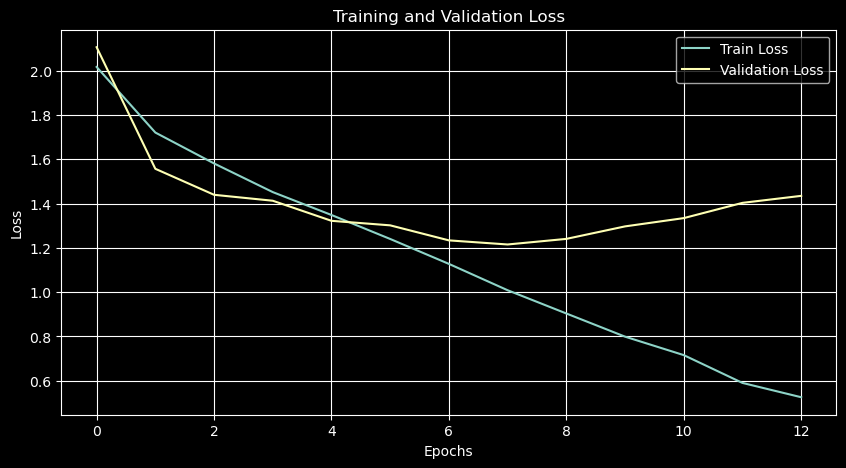

TypeError: model_calassification_report() got an unexpected keyword argument 'class_names'

In [ ]:
class RegularizedCNN(nn.Module):
    def __init__(self, input, n_classes, dropout_rate=0.5):
        super().__init__()
        self.conv = nn.Sequential(
            # 224*224
            nn.Conv2d(input[0], 32, kernel_size=3, padding=1),
            nn.BatchNorm2d(32),  # Batch Normalization
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Dropout2d(p=0.1),  # Dropout espacial
            
            # 112*112
            nn.Conv2d(32, 32, kernel_size=3, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Dropout2d(p=0.2),
            
            # 56*56
            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Dropout2d(p=0.25),
            # 28*28
        )
        
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(64 * 28 * 28, 512),
            nn.BatchNorm1d(512),
            nn.ReLU(inplace=True),
            nn.Dropout(p=dropout_rate),
            
            nn.Linear(512, 256),
            nn.BatchNorm1d(256),
            nn.ReLU(inplace=True),
            nn.Dropout(p=dropout_rate),
            
            nn.Linear(256, n_classes),
        )
    
    def forward(self, x):
        x = self.conv(x)
        x = self.classifier(x)
        return x

# Crear el modelo con regularización
modelo_regularizado = RegularizedCNN(train_loader.dataset[0][0].shape, nclasses, dropout_rate=0.5).to(DEVICE)
print(modelo_regularizado)

# Optimizer con weight decay (L2 regularization)
optimizer_reg = optim.Adam(modelo_regularizado.parameters(), lr=1e-3, weight_decay=1e-4)

# Entrenar el modelo regularizado
train_errors_reg, val_errors_reg = utils.train(
    modelo_regularizado, 
    optimizer=optimizer_reg, 
    criterion=criterion, 
    do_early_stopping=True,
    train_loader=train_loader, 
    val_loader=val_loader, 
    device=DEVICE, 
    epochs=50
)



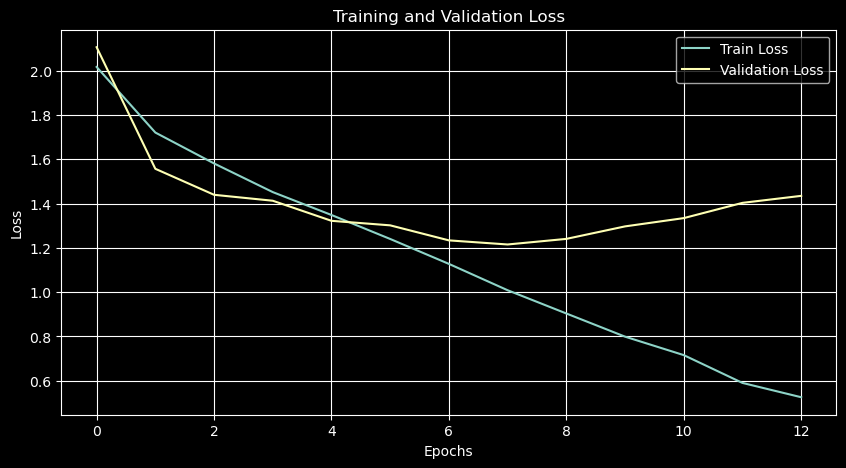

Accuracy: 0.5705

Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.75      0.59      0.66       223
           1       0.49      0.79      0.61       179
           2       0.63      0.60      0.61       189
           3       0.46      0.25      0.32       168
           4       0.64      0.59      0.62       182
           5       0.60      0.54      0.57       171
           6       0.61      0.56      0.58       200
           7       0.38      0.57      0.46       177
           8       0.56      0.53      0.54       215
           9       0.67      0.68      0.67       189

    accuracy                           0.57      1893
   macro avg       0.58      0.57      0.56      1893
weighted avg       0.58      0.57      0.57      1893



In [ ]:
# Visualizar resultados
utils.plot_taining(train_errors_reg, val_errors_reg)
utils.model_calassification_report(modelo_regularizado, test_loader, device=DEVICE, nclasses=nclasses)

In [ ]:



wandb.login()

AttributeError: `np.float_` was removed in the NumPy 2.0 release. Use `np.float64` instead.